 <a id="1"></a>
# <p style="background-color:#627D78;font-family:newtimeroman;color:#D5CABD;font-size:150%;text-align:center;border-radius:20px 60px;">Welcome in this Notebook</p>

**The goal of these notebooks is to provide a set of tabular data that is fun and easy to access for anyone. These notebooks would be great for people looking for something for new learning**
**On this netbook, we will do some special analyzes in order to show the best results AND TRAIN THE MODEL FOR BEST ACCURACY. Welcome and let's start**

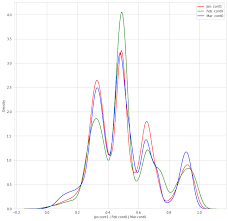

In [ ]:
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
import seaborn as sns
from matplotlib import ticker
import missingno as no
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot
# for train model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import zero_one_loss


In [ ]:
train_df=pd.read_csv('../input/tabular-playground-series-apr-2021/train.csv')
test_df=pd.read_csv('../input/tabular-playground-series-apr-2021/test.csv')
sample_submision=pd.read_csv('../input/tabular-playground-series-apr-2021/sample_submission.csv')


# read data by using head()

In [ ]:
train_df.head(10)

#### Showing information about data train


In [ ]:
train_df.info()

In [ ]:
# describe data 
train_df.describe()

In [ ]:
# showing shape of data
train_df.shape

##### Check if there is blank data or not

In [ ]:
train_df.isnull().sum()

In [ ]:
train_df['Sex'] = 1*(train_df['Sex'] == 'male')
test_df['Sex'] = 1*(test_df['Sex'] == 'male')

##### we can change the male and female to 0 for male and 1 for female

In [ ]:
test_df['Age'].fillna((train_df['Age'].mean()), inplace=True)
train_df['Age'].fillna((train_df['Age'].mean()), inplace=True)
test_df['Fare'].fillna((train_df['Fare'].mean()), inplace=True)
train_df['Fare'].fillna((train_df['Fare'].mean()), inplace=True)
test_df['SibSp'].fillna((train_df['SibSp'].mean()), inplace=True)
train_df['SibSp'].fillna((train_df['SibSp'].mean()), inplace=True)
test_df['Parch'].fillna((train_df['Parch'].mean()), inplace=True)
train_df['Parch'].fillna((train_df['Parch'].mean()), inplace=True)

In [ ]:
train_df

####  we can cheak the Missing value for train

In [ ]:
# this is colure use for plot
primary_blue = "#496595"
primary_blue2 = "#85a1c1"
primary_grey = "#c6ccd8"
primary_black = "#202022"
missing = (train_df.isna().sum().sort_values(ascending=False) / len(train_df) * 100)[:6]
fig, ax = plt.subplots(1,1,figsize=(9, 8))

ax.bar(missing.index, 100, color=primary_grey, width=0.8)

bar = ax.bar(missing.index, missing, color=primary_black, width=0.6)
ax.bar_label(bar, fmt='%.01f %%')
ax.spines.left.set_visible(False)
ax.set_yticks([])
ax.set_title('Missing Values Ratio', fontweight='bold')
plt.show()

### we can clean the massing value 

In [ ]:
train_df.dropna(inplace=True)
train_df

### cheak the missing value after the cleang

In [ ]:
missing = (train_df.isna().sum().sort_values(ascending=False) / len(train_df) * 100)[:6]
fig, ax = plt.subplots(1,1,figsize=(9, 8))

ax.bar(missing.index, 100, color=primary_grey, width=0.8)

bar = ax.bar(missing.index, missing, color=primary_black, width=0.6)
ax.bar_label(bar, fmt='%.01f %%')
ax.spines.left.set_visible(False)
ax.set_yticks([])
ax.set_title('Missing Values Ratio', fontweight='bold')
plt.show()

<a id="3.1"></a>
# <p style="background-color:#627D78;font-family:newtimeroman;color:#D5CABD;font-size:150%;text-align:center;border-radius:20px 60px;">Explor Data ana visualization</p>

In [ ]:
## so that u dont have warnings
from warnings import filterwarnings
filterwarnings('ignore')


# ploting columns Survived 
sns.pairplot(data=train_df, hue= "Survived")

In [ ]:
# using count ploting to show the number of died and live 
plt.figure(figsize=(8,6))
sns.countplot(train_df['Survived'])
plt.show()

In [ ]:
train_df.groupby('Name')['Survived'].max().nlargest(10).plot.bar()

#### Check the ferist data by name

In [ ]:
trace1 = go.Bar( 
        x = train_df.groupby('Name')['Survived'].max().nlargest(100).index,
        y = train_df.groupby('Name')['Survived'].max().nlargest(100),
        name= 'Name')
iplot([trace1])

#### Here check the tail of number of name 

In [ ]:
trace1 = go.Bar( 
        x = train_df.groupby('Name')['Survived'].max().tail(100).index,
        y = train_df.groupby('Name')['Survived'].max().tail(100),
        name= 'Name')
iplot([trace1])

In [ ]:

cuisines=train_df['Survived'].value_counts()[:100]
sns.barplot(cuisines,cuisines.index)
plt.xlabel('Count')
plt.title("Most Died ")

### Check the corr for data and use the heatmap to show this 

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(train_df.corr(), annot=True, cbar=False, fmt='.1g', linewidth=0.1);


<a id="3.1"></a>
# <p style="background-color:#627D78;font-family:newtimeroman;color:#D5CABD;font-size:150%;text-align:center;border-radius:20px 60px;">Now we can check the model</p>

In [ ]:
train_df.head(2)

In [ ]:
train_df.dtypes

#### we can dorp the columns we don't interested for it


In [ ]:
new_data=train_df.drop(['PassengerId','Name','Ticket','Cabin','Embarked','Age','Fare'],axis=1)
new_data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(new_data)
print(scaler.mean_)

In [ ]:
X = new_data.drop(['Survived'],axis=1)
y = new_data['Survived']


<a id="3.1"></a>
# <p style="background-color:#627D78;font-family:newtimeroman;color:#D5CABD;font-size:150%;text-align:center;border-radius:20px 60px;">Train test split</p>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Using LogisticRegressionModel

In [ ]:
LogisticRegressionModel = LogisticRegression(penalty='l2',solver='sag',C=1,random_state=33,intercept_scaling=1)
LogisticRegressionModel.fit(X_train, y_train)

### Calculating Details

In [ ]:
#Calculating Details
print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(X_train, y_train))
print('LogisticRegressionModel Test Score is : ' , LogisticRegressionModel.score(X_test, y_test))


In [ ]:
print('LogisticRegressionModel Classes are : ' , LogisticRegressionModel.classes_)
print('LogisticRegressionModel No. of iteratios is : ' , LogisticRegressionModel.n_iter_)

In [ ]:
#Calculating Prediction
y_pred = LogisticRegressionModel.predict(X_test)
y_pred_prob = LogisticRegressionModel.predict_proba(X_test)
print("*********************************************************")
print('Predicted Value for LogisticRegressionModel is : ' , y_pred[:10])
print("*********************************************************")

print('Prediction Probabilities Value for LogisticRegressionModel is : ' , y_pred_prob[:10])


In [ ]:
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)


In [ ]:
sns.heatmap(CM)

In [ ]:
#Calculating Accuracy Score  : ((TP + TN) / float(TP + TN + FP + FN))
AccScore = accuracy_score(y_test, y_pred)
print('Accuracy Score is : ', AccScore)


### Making Linear Model

In [ ]:
#making Linear Model
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

y_pred=regressor.predict(X_test)
y_pred

In [ ]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
#Calculating Prediction
y_pred = regressor.predict(X_test)
print('Predicted Value for LogisticRegressionModel is : ' , y_pred[:10])
print("*********************************************************")

print('Prediction Probabilities Value for LogisticRegressionModel is : ' , y_pred_prob[:10])

### Using KNN

In [ ]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 1000, metric = 'minkowski', p = 3)
classifier.fit(X_train, y_train)


In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred[:10]

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm)

In [ ]:
#Calculating Accuracy Score  : ((TP + TN) / float(TP + TN + FP + FN))
AccScore = accuracy_score(y_test, y_pred)
print('Accuracy Score is : ', AccScore)

#### Fitting Decision Tree Regression to the datase

In [ ]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)

In [ ]:
# Predicting a new result
y_pred=regressor.predict(X_test)
y_pred

### Check model Evaluate

In [ ]:
from sklearn.model_selection import cross_val_predict
models = [LogisticRegressionModel , regressor , classifier ]

In [ ]:
x=0
for m in models:
    x+=1
    
    for n in range(2,5):
        print('result of model number : ' , x ,' for cv value ',n,' is \n' , cross_val_predict(m, X, y, cv=n))  
        print('-----------------------------------')
    print('=====================================')
    print('=====================================')


<a id="4"></a>
# <p style="background-color:#627D78;font-family:newtimeroman;color:#D5CABD;font-size:150%;text-align:center;border-radius:20px 60px;">END</p>